In [2]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import csv
import tkinter as tk
import pandas as pd
import time

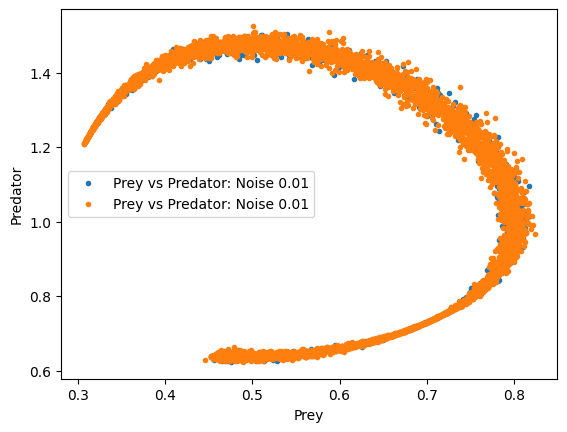

In [2]:
def DatenGenerieren():
    
    Störung = float(eingabe_Sigma.get()) 
    Umdrehungen = int(eingabe_Umdrehung.get())
    ProzentderDaten = int(eingabe_Daten.get())
    
    def Euler(h, x, func):
        erg = (x+h*func)
        return erg

    def dx(a,b,x,y):
        erg = a*x-b*x*y
        return erg

    def dy(c,d,x,y):
        erg = -c*y+d*x*y
        return erg
    
    #Euler Methode
    
    x0 = 1
    y0 = 0.8

    a= 2/3
    b= 4/3
    c= 1
    d= 1

    steps = Umdrehungen * 10000
    h= 0.001
    
    i= 0
    x = [x0]
    y = [y0]
    t = [0]

    while i <= steps:
        x_i = Euler(h, x[i], dx(a, b, x[i], y[i]))
        y_i = Euler(h, y[i], dy(c, d, x[i], y[i]))
        x.append(x_i)
        y.append(y_i)
    
        t_i = t[i]+h
        t.append(t_i)
        i+=1
        
    #noise genereieren
    
    sigma = Störung/100
    noise = 1+np.random.normal(0,sigma, len(x))

    x= x*noise
    y = y*noise
    
    #x= x[:steps/2]
    #y= y[steps/2]
    
    #Arrays in train und test trennen

    Prey_train = np.array(x[:int(steps/2):ProzentderDaten])
    Predator_train = np.array(y[:int(steps/2):ProzentderDaten])
    
    Prey_test = np.array(x[int(steps/2)::ProzentderDaten])
    Predator_test = np.array(y[int(steps/2)::ProzentderDaten])

    # Als CSV datei speichern

    Prey_train_CSV = [[i] for i in Prey_train]
    Predator_train_CSV = [[i] for i in Predator_train]
    
    Prey_test_CSV = [[i] for i in Prey_test]
    Predator_test_CSV = [[i] for i in Predator_test]

    with open(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PreyNoice{sigma}_train.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(Prey_train_CSV)
    with open(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PredatorNoice{sigma}_train.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(Predator_train_CSV)
    
    with open(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PreyNoice{sigma}_test.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(Prey_test_CSV)
    with open(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PredatorNoice{sigma}_test.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(Predator_test_CSV)
    
def vsTimePloten():  
    sigma = float(eingabe_Sigma.get())/100 
    Umdrehungen = int(eingabe_Umdrehung.get())
    ProzentderDaten = int(eingabe_Daten.get())
    
    Prey = pd.read_csv(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PreyNoice{sigma}_test.csv')
    Predator = pd.read_csv(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PredatorNoice{sigma}_test.csv')
    
    plt.figure("VSTime")
    plt.plot(Prey, label = "Prey")
    plt.plot(Predator, label = "Predator")
    
    plt.ylabel("Prey Predator")
    plt.xlabel("time")

    plt.grid()
    plt.legend()
    
    plt.savefig(rf"C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\VersusTimePlot_Sigma{sigma}.pdf")

    
    #image = tk.PhotoImage(file=f"VersusTimePlot_Sigma{sigma}.pdf")
    #image_label = tk.Label(fenster, image=image)
    #image_label.image = image
    #image_label.pack()

def PredvsPrey():
    sigma = float(eingabe_Sigma.get())/100
    Umdrehungen = int(eingabe_Umdrehung.get())
    ProzentderDaten = int(eingabe_Daten.get())
    
    Prey = pd.read_csv(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PreyNoice{sigma}_test.csv')
    Predator = pd.read_csv(rf'C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PredatorNoice{sigma}_test.csv')
    
    plt.figure("PredatorVSPrey")
    plt.plot(Predator, Prey, ".", label= f"Prey vs Predator: Noise {sigma}")
    
    plt.xlabel("Prey")
    plt.ylabel("Predator")

    plt.grid()
    plt.legend()
    
    plt.savefig(rf"C:\Users\Jkeus\OneDrive - Universität Münster\0Studium\Nich-Lineare-Modelierung\Noise-Research\PreyVsPredPlot_Noise{sigma}.pdf")
    
    
    #image = tk.PhotoImage(file=f"PreyVsPredPlot_Noise{sigma}.pdf")
    #image_label = tk.Label(fenster, image=image)
    #image_label.image = image
    #image_label.pack()
    
fenster = tk.Tk()
fenster.title("Noise")


eingabe_label = tk.Label(fenster, text="Was für Noise")
eingabe_label.grid(row=1)

Feld_Sigma = tk.Label(fenster, text = "Sigma:")
Feld_Sigma.grid(row=2, column=0)

eingabe_Sigma = tk.Entry(fenster)
eingabe_Sigma.grid(row = 2, column=1)

Feld_Umdrehung = tk.Label(fenster, text = "Umdrehungen")
Feld_Umdrehung.grid(row = 3, column=0)

eingabe_Umdrehung = tk.Entry(fenster)
eingabe_Umdrehung.grid(row=3, column=1)

Feld_Daten = tk.Label(fenster, text = "Jeder")
Feld_Daten.grid(row=4, column=0)

eingabe_Daten = tk.Entry(fenster)
eingabe_Daten.grid(row=4, column=1)

Feld_Daten = tk.Label(fenster, text = ".ste Datenpunkt wird genommen")
Feld_Daten.grid(row=4, column=2)



button_Generieren = tk.Button(fenster, text="Generieren", command= DatenGenerieren )
button_Generieren.grid(row = 5, column= 0)

button_PreyPredPlot = tk.Button(fenster, text="Plot Prey vs Plot", command= PredvsPrey )
button_PreyPredPlot.grid(row=5, column=1)

button_TimePlot = tk.Button(fenster, text="Plot Prey/Plot vs time", command= vsTimePloten )
button_TimePlot.grid(row=5, column=2)

label = tk.Label(fenster, text="")
label.grid(row = 6)

fenster.mainloop()
    

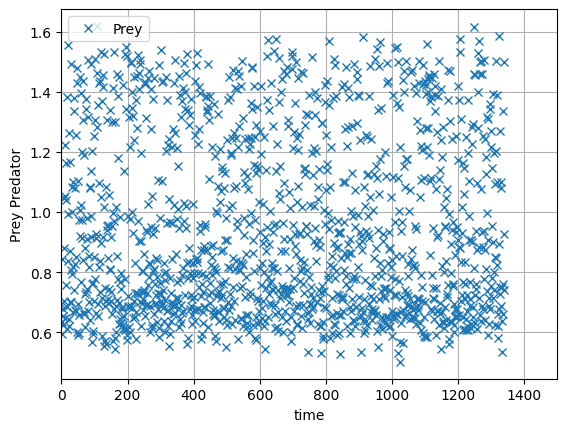

In [10]:
Prey = pd.read_csv(rf'y_train_Prey_LV.csv')
Predator = pd.read_csv(rf'y_train_Predator_LV.csv')
    
# Plotten Sie die Beutetierdaten
plt.plot(Prey.index, Prey['Prey_next'],"x", label='Prey')

    
plt.ylabel("Prey Predator")
plt.xlabel("time")
plt.grid()
plt.xlim(0,1500)
plt.legend()